# Load n Merge

In [1]:
from pipelines.merge_pipeline import build_merged_dataset

In [2]:
df = build_merged_dataset(save_csv=True)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_weather = df
train = train_weather

train['trip_duration_min'] = train['trip_duration'] / 60
train['trip_duration_hour'] = train['trip_duration_min'] / 60
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_day'] = train['pickup_datetime'].dt.dayofweek
train['pickup_month'] = train['pickup_datetime'].dt.month
train['day_of_year'] = train['pickup_datetime'].dt.dayofyear
train['hour_of_year'] = (train['day_of_year'] - 1) * 24 + train['pickup_hour']
train['pickup_day_name'] = train['pickup_day'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})
train['pickup_month_name'] = train['pickup_month'].map({
    1: 'January', 2: 'February',
    3: 'March', 4: 'April', 5: 'May', 6: 'June'
})

print(train.columns.tolist())

['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'is_group_trip', 'passenger_count_invalid', 'pickup_longitude_invalid', 'pickup_latitude_invalid', 'dropoff_longitude_invalid', 'dropoff_latitude_invalid', 'trip_duration_outlier', 'store_and_fwd_flag_bin', 'is_holiday', 'trip_duration_min', 'trip_duration_log', 'hav_dist_km', 'hav_dist_km_log', 'route_distance_km', 'pickup_hour', 'pickup_weekday', 'pickup_month', 'hour_of_year', 'is_weekend', 'is_early_morning', 'is_rush_am', 'is_rush_pm', 'is_night', 'route_distance_log_km', 'pickup_cluster', 'dropoff_cluster', 'is_jfk_pick', 'is_jfk_drop', 'is_laguardia_pick', 'is_laguardia_drop', 'datetime', 'temp_c', 'windspeed_kph', 'humidity', 'pressure_hpa', 'daily_precip_mm', 'daily_snow_mm', 'rain_mm', 'snow_mm', 'windspeed_kph_sqrt', 'fog', 'rain', 'snow', 'conditions', 'datetime_hour', 'hour_of_da

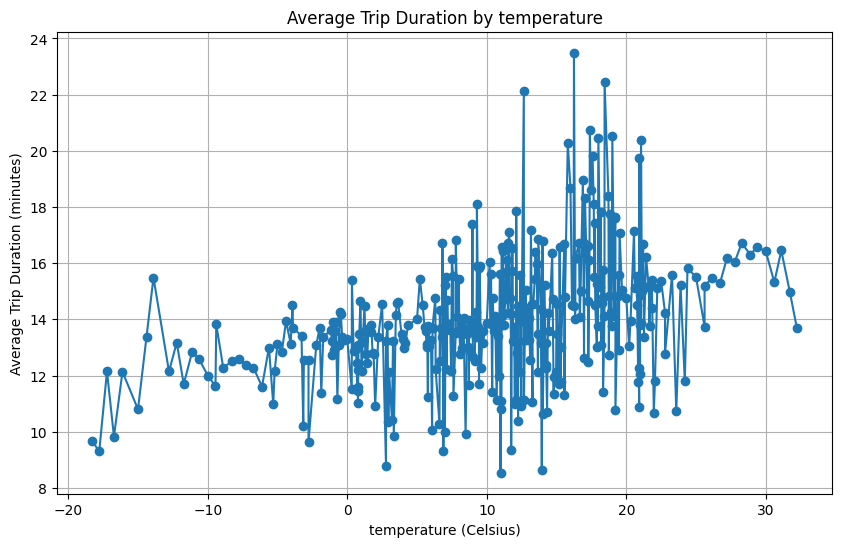

In [11]:
hourly_avg = train_weather.groupby('temp_c')['trip_duration_min'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg, marker='o', linestyle='-')
plt.title('Average Trip Duration by temperature')
plt.xlabel('temperature (Celsius)')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True)
plt.show()

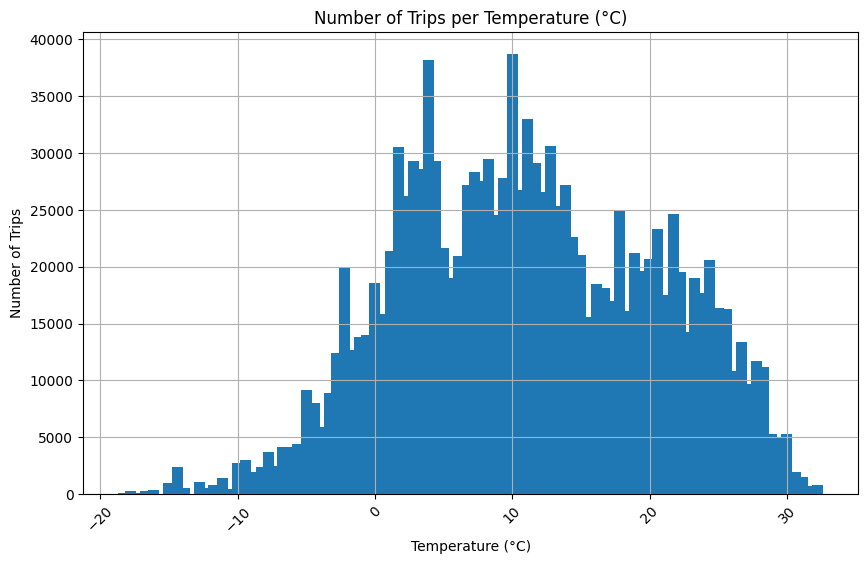

In [12]:
# Count the number of trips for each temperature
trip_counts = train_weather.groupby('temp_c').size()

# Plot the trip counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(trip_counts.index, trip_counts)
plt.title('Number of Trips per Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

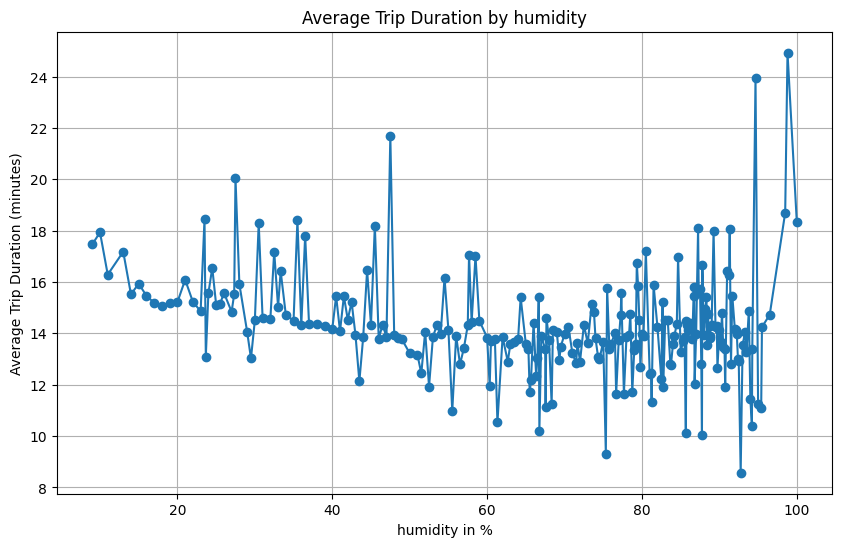

In [13]:
hourly_avg = train_weather.groupby('humidity')['trip_duration_min'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg, marker='o', linestyle='-')
plt.title('Average Trip Duration by humidity')
plt.xlabel('humidity in %')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True)
plt.show()

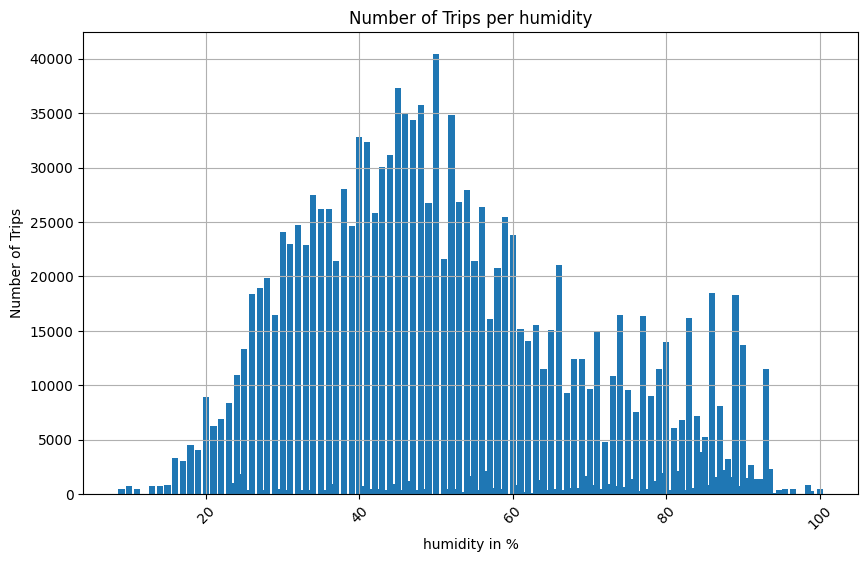

In [14]:
# Count the number of trips for each temperature
trip_counts = train_weather.groupby('humidity').size()

# Plot the trip counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(trip_counts.index, trip_counts)
plt.title('Number of Trips per humidity')
plt.xlabel('humidity in %')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 

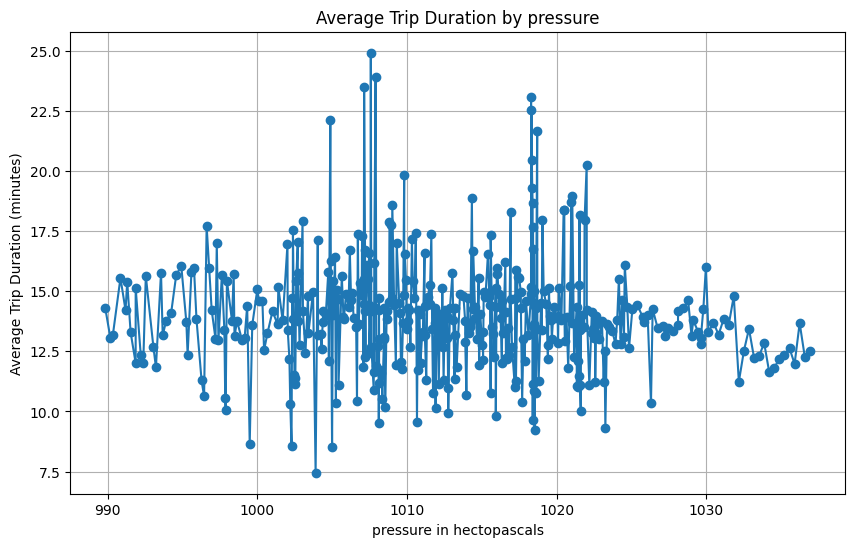

In [18]:
hourly_avg = train_weather.groupby('pressure_hpa')['trip_duration_min'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg, marker='o', linestyle='-')
plt.title('Average Trip Duration by pressure')
plt.xlabel('pressure in hectopascals')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True)
plt.show()

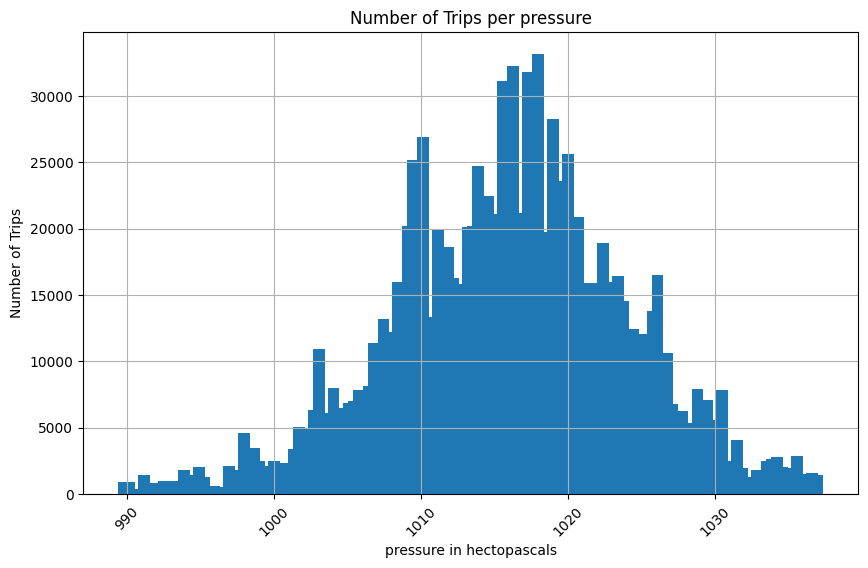

In [19]:
# Count the number of trips for each temperature
trip_counts = train_weather.groupby('pressure_hpa').size()

# Plot the trip counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(trip_counts.index, trip_counts)
plt.title('Number of Trips per pressure')
plt.xlabel('pressure in hectopascals')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 

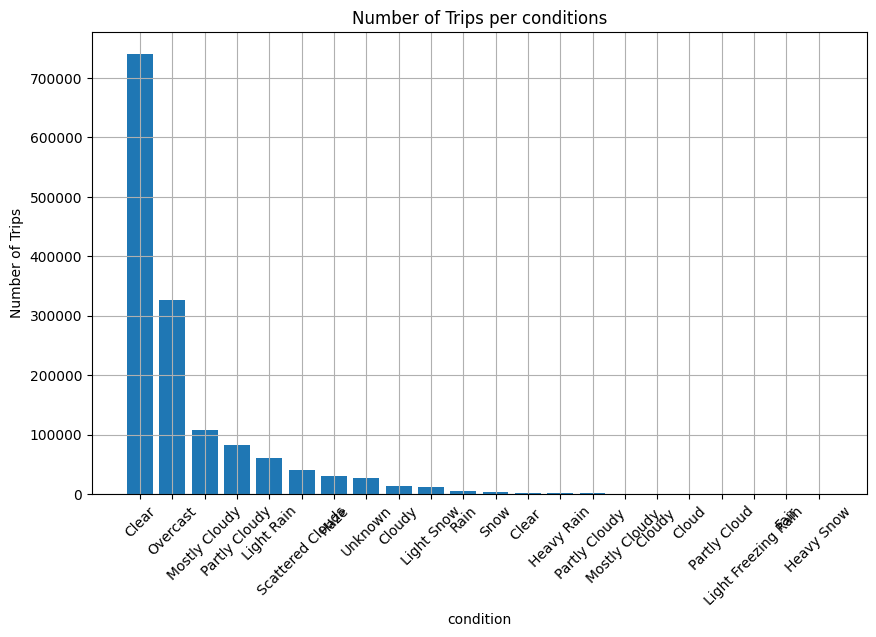

In [15]:
# Count the number of trips for each temperature
trip_counts = train_weather.groupby('conditions').size()

trip_counts = trip_counts.sort_values(ascending=False)
# Plot the trip counts using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(trip_counts.index, trip_counts)
plt.title('Number of Trips per conditions')
plt.xlabel('condition')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 